<a href="https://colab.research.google.com/github/Helyousfi/Neural-Networks/blob/main/TFneuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import categorical_crossentropy

## This is How to create a model :

In [4]:
model = Sequential(
    [
      Dense(4, input_shape=(1,), activation='relu'),
      Dense(3, activation='relu'),
      Dense(2, activation='softmax')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [5]:
model2 = Sequential()
model2.add(Dense(4, input_shape=(1,), activation='relu'))
model2.add(Dense(3, activation='relu'))
model2.add(Dense(2, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 8         
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Compile the Model so it's ready for training

In [6]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Create Our Own Random Dataset That We Can Train Our Neural Network On

- A vaccine is tested on 5250 individuals from age 10 to 90.
- The individuals are split into two equal groups. First group is under 50 years and the second group is over 50 years.
- 95% in group 1 had no side effects.
- 95% in group 2 had side effects.

In [7]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [8]:
training_set = []
training_labels = []

for i in range(int(0.95*5250)):
  randAgeUnder50 = randint(10,50)
  training_set.append(randAgeUnder50)
  training_labels.append(0)

  randAgeOver50 = randint(51, 90)
  training_set.append(randAgeOver50)
  training_labels.append(1)

for i in range(int(0.05*5250)):
  randAgeUnder50 = randint(10,50)
  training_set.append(randAgeUnder50)
  training_labels.append(1)

  randAgeOver50 = randint(51, 90)
  training_set.append(randAgeOver50)
  training_labels.append(0)

(training_set, training_labels) = shuffle(training_set, training_labels)

In [10]:
training_set = np.array(training_set)
training_labels = np.array(training_labels)

print(training_set)
print(training_labels)

[42 50 89 ... 75 22 49]
[0 0 1 ... 1 1 0]


## Create the model and compile it :

In [11]:
model = Sequential([
      Dense(units=1, input_shape=(1,), activation='relu'),
      Dense(units=24, activation='relu'),
      Dense(units=12, activation='relu'),
      Dense(units=2, activation='softmax')
])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Train the model

In [12]:
model.fit(x=training_set, y=training_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
945/945 - 3s - loss: 0.3180 - accuracy: 0.8948 - val_loss: 0.2618 - val_accuracy: 0.9486 - 3s/epoch - 4ms/step
Epoch 2/30
945/945 - 1s - loss: 0.2758 - accuracy: 0.9179 - val_loss: 0.2495 - val_accuracy: 0.9314 - 1s/epoch - 1ms/step
Epoch 3/30
945/945 - 1s - loss: 0.2620 - accuracy: 0.9208 - val_loss: 0.2509 - val_accuracy: 0.9114 - 1s/epoch - 1ms/step
Epoch 4/30
945/945 - 1s - loss: 0.2590 - accuracy: 0.9211 - val_loss: 0.2387 - val_accuracy: 0.9286 - 1s/epoch - 1ms/step
Epoch 5/30
945/945 - 1s - loss: 0.2494 - accuracy: 0.9218 - val_loss: 0.2260 - val_accuracy: 0.9390 - 1s/epoch - 1ms/step
Epoch 6/30
945/945 - 1s - loss: 0.2484 - accuracy: 0.9247 - val_loss: 0.2624 - val_accuracy: 0.9057 - 1s/epoch - 1ms/step
Epoch 7/30
945/945 - 1s - loss: 0.2482 - accuracy: 0.9232 - val_loss: 0.2204 - val_accuracy: 0.9400 - 1s/epoch - 1ms/step
Epoch 8/30
945/945 - 1s - loss: 0.2502 - accuracy: 0.9222 - val_loss: 0.2715 - val_accuracy: 0.8971 - 1s/epoch - 1ms/step
Epoch 9/30
945/945 - 1s 

In [24]:
test = np.array([10, 45, 55, 90, 12, 28, 36, 67, 87])
test_labels = np.array([0, 0, 1, 1, 0, 0, 0, 1, 1])
predictions = model.predict(test)
rounded_predictions = np.argmax(predictions, axis=-1)

## Visualize The Prediction Results From The Neural Network On Test Data

In [14]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [15]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without Normalization")

  print(cm)

  thresh = cm.max() / 2.0

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

Confusion Matrix without Normalization
[[5 0]
 [0 4]]


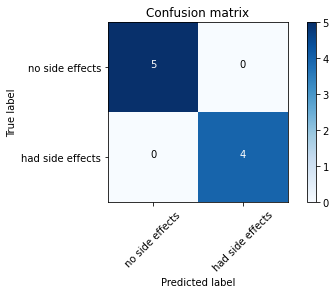

In [25]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

cm_plot_labels = ['no side effects', 'had side effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

## How To Save A Neural Networks Architecture and Weights When It's Done Training

In [26]:
import os.path
if os.path.isfile('vaccine_trial_model.h5') is False:
  model.save('vaccine_trial_model.h5')
  print("Model Saved!")

Model Saved!


In [27]:
from tensorflow.keras.models import load_model
new_model = load_model('vaccine_trial_model.h5')

In [28]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 24)                48        
                                                                 
 dense_8 (Dense)             (None, 12)                300       
                                                                 
 dense_9 (Dense)             (None, 2)                 26        
                                                                 
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________


In [30]:
new_model.get_weights()

[array([[0.33936763]], dtype=float32),
 array([-7.6018977], dtype=float32),
 array([[ 0.09157257, -0.28969055,  0.09055851, -0.30291414, -0.19957851,
         -0.3349602 , -0.18817453,  0.14550884, -0.04606202, -0.29456547,
          0.06859418,  0.48644394, -0.43052262, -0.09139524, -0.05509433,
         -0.10267084, -0.4407539 , -0.15075791, -0.3072281 , -0.4146091 ,
          0.2592575 , -0.21842456, -0.06545714,  0.50452316]],
       dtype=float32),
 array([-1.4239715e+00,  0.0000000e+00, -1.6952542e+00,  0.0000000e+00,
        -1.6322057e-03,  0.0000000e+00, -1.6014339e-02, -1.9795085e+00,
         0.0000000e+00,  0.0000000e+00, -1.6406070e+00, -4.2243156e+00,
         0.0000000e+00, -2.2537760e-02,  0.0000000e+00, -2.3478533e-04,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        -3.0379670e+00, -1.7301674e-03,  0.0000000e+00, -4.4097872e+00],
       dtype=float32),
 array([[-1.01712608e+00,  1.67196110e-01, -4.23338234e-01,
         -3.05102974e-01, 

## Save The Neural Network To A JSON File

In [31]:
json_string = model.to_json()

In [32]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_6_input"}}, {"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 24, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "b

In [33]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [34]:
model_architecture.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 dense_7 (Dense)             (None, 24)                48        
                                                                 
 dense_8 (Dense)             (None, 12)                300       
                                                                 
 dense_9 (Dense)             (None, 2)                 26        
                                                                 
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________


## Only Save The Weights Of The Neural Network

In [35]:
import os.path
if os.path.isfile('model_weights.h5') is False:
  model.save_weights('model_weights.h5')
  print("Model Saved!")

Model Saved!


In [38]:
model2 = Sequential([
      Dense(units=1, input_shape=(1,), activation='relu'),
      Dense(units=24, activation='relu'),
      Dense(units=12, activation='relu'),
      Dense(units=2, activation='softmax')
])

In [39]:
model2.load_weights('model_weights.h5')

In [41]:
model2.get_weights()

[array([[0.33936763]], dtype=float32),
 array([-7.6018977], dtype=float32),
 array([[ 0.09157257, -0.28969055,  0.09055851, -0.30291414, -0.19957851,
         -0.3349602 , -0.18817453,  0.14550884, -0.04606202, -0.29456547,
          0.06859418,  0.48644394, -0.43052262, -0.09139524, -0.05509433,
         -0.10267084, -0.4407539 , -0.15075791, -0.3072281 , -0.4146091 ,
          0.2592575 , -0.21842456, -0.06545714,  0.50452316]],
       dtype=float32),
 array([-1.4239715e+00,  0.0000000e+00, -1.6952542e+00,  0.0000000e+00,
        -1.6322057e-03,  0.0000000e+00, -1.6014339e-02, -1.9795085e+00,
         0.0000000e+00,  0.0000000e+00, -1.6406070e+00, -4.2243156e+00,
         0.0000000e+00, -2.2537760e-02,  0.0000000e+00, -2.3478533e-04,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        -3.0379670e+00, -1.7301674e-03,  0.0000000e+00, -4.4097872e+00],
       dtype=float32),
 array([[-1.01712608e+00,  1.67196110e-01, -4.23338234e-01,
         -3.05102974e-01, 